# Multi-Layer Perceptron (MLP) Classifier

In this notebook, we build an MLP classifier using the **TensorFlow (2.0) Keras API**. The MLP is a Dense or Fully-Connected (FC) neural network. 

We use the MLP classifier to perform multi-class classification on the **MNIST handwritten digits** dataset.


## Regularization Techniques

We employ the following regularization techniques.
- Dropout regularization
- Early Stopping regularization


Another regularization technique is the **L1 or L2 norm** based regularization. We did not use this technique, but we provided commented-out codes for this regularization.


## Learning Curves
To help understand a model's performance (underfitting/overfitting, etc.), we plot its training & validation accuracy/loss with respect to the epochs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

## Load & Scale the Dataset

- Load the MNIST data using the Kears API
- Create a separate validation set
- Scale the data

### Saling Technique

We use the Min-Max scaling technique.

$X = \frac{X - X_{min}}{X_{max} - X_{min}}$

=> $X = \frac{X - 0}{255 - 0} = \frac{X}{255}$

In [2]:
mnist = tf.keras.datasets.mnist

# Load the full training & test data
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()


# Create validation dataset as well as scale (max-min scaling) the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)

11490434/11490434 [==============================] - 1s 0us/step
No. of Training Samples:  (55000, 28, 28)
No. of Training Labels:  (55000,)

No. of Validation Samples:  (5000, 28, 28)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 28, 28)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


## Build the MLP Model


We want to build the following two hidden layer-based architecture for the MLP model:
- Two hidden layers each with 300 and 100 neurons, respectively
- One classification layer (final layer) with 10 neurons


We use the following steps to build the above architecture.
- Create a Sequential model.

- Add following 4 layers in the model: input preprocessing layer, 2 hidden layers and one output layer.

- Layer 1 (Input Preprocessing): At first, we need to flatten the input images to create 1D array for each image. It is done by the **Flatten layer** that reshapes the input data X as follows: X.reshape(-1, 1). It is a type of Reshaping layer: https://keras.io/api/layers/reshaping_layers/ 

        -- This layer does some simple preprocessing & does not have any parameters. Since it is the first layer in the model, we should specify the input_shape, i.e., the shape of the instances, i.e., 28 x 28. We don't need to include the batch size. 
        
        -- An alternative to this is to flatten the input features prior to creating the model. Then, in the model, instead of having the Flatten layer, we could simply add an Input layer that instantiates an input tensor for building the model as follows: keras.Input(shape=(784,)). Note that the shape value is 784 (don't include the batch size), not 28 x 28, because we have flattened the input already. 

- Layer 2 and 3 (Hidden Layers): Next we add two **Dense** hidden layers with 300 neurons and 100 neurons, respectively. 

A Dense layer is a regular densely-connected neural network layer. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). 
        
For each Dense layer, specify the following:

         -- Number of neurons (units): for the final layer number of neurons should be one (for binary classification) and equal to the number of classes (for multi-class classification)
         
         -- Weight initializer (kernel_initializer)
         
         -- Activation function (activation): for the final layer activation function should be "sigmoid" (for binary classification) and "softmax" (for multi-class classification)
         

- To apply regularization, add a Dropout layer after the Dense layer (except the final layer). Only set the "rate" parameter. Note that the dropout layer is added only after the hidden layers.
https://keras.io/api/layers/regularization_layers/dropout/
        

- Layer 4 (Output Layer): Finally, we add a **Dense** output layer with 10 neurons (one per class). We use the softmax activation function (because the classes are exclusive).


Find a suitable weight initializer (using the kernel_initializer argument) from the following link:
https://keras.io/api/layers/initializers/#available-initializers


Find a suitable activation function (using the activation argument) from the following link:
https://keras.io/api/layers/activations/#available-activations


In [3]:
%%time


'''
Delete the TensorFlow graph before creating a new model, otherwise, memory overflow will occur.
'''
tf.keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(42) ensures that any random numbers generated using NumPy will be the same in each run.
tf.random.set_seed(42) ensures that any random numbers generated using TensorFlow 
(such as during weight initialization or stochastic processes in TensorFlow) will be the same in each run.
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Set the values for the weight initializer and activation function
'''
kernel_initializer = 'random_normal'
activation_hidden = 'sigmoid'
activation_final = 'softmax'
number_of_classes = 10


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization
'''
model = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation_hidden, 
                             bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation_hidden,
                            bias_initializer="zeros"))
model.add(tf.keras.layers.Dropout(rate=0.1)) # add if needed
model.add(tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
                             activation=activation_final))



'''
An alternative technique to create the MLP using the Sequential model 
- Pass a list of layers when creating the Sequential model
'''
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation),
#     tf.keras.layers.Dropout(rate=0.5), # add if needed
#     tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation),
#     tf.keras.layers.Dropout(rate=0.1), # add if needed
#     tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
#                              activation="softmax")
# ])



'''
Create the MLP with L2 regularization
'''
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer, activation=activation, 
#                        kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
#     tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer, activation=activation, 
#                        kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
#     tf.keras.layers.Dense(units=number_of_classes, kernel_initializer=kernel_initializer, 
#                             activation="softmax")
# ])


# Display a detailed summary of the model: layer names and types, output shape, and the number of parameters
model.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 2

## Model Summary

From the model summary (above) observe the number of layers, the shape of the output, and the number of weights (parameters).

- Number of parameters Input --> Hidden Layer 1: (784 features + 1 bias neuron) * 300 hidden neurons = 235,500

- Number of parameters Hidden Layer 1 --> Hidden Layer 2: (300 features/neurons + 1 bias neuron) * 100 hidden neurons = 30,100

- Number of parameters Hidden Layer 2 --> Output Layer: (100 features/neurons + 1 bias neuron) * 10 neurons = 1,010

Total number of trainable weights = 235,500 + 30,100 + 1,010 = 266,610

## Compile & Train the MLP Model

A Keras model automatically employs the **backpropagation** algorithm to train an artificial neural network (ANN). However, we need to specify an optimization algorithm.

There are various advanced optimizers available, but for our MLP, we will use the **stochastic gradient descent (SGD)** optimizer, which requires setting an appropriate learning rate.

We will implement mini-batch SGD, so it's essential to specify both the batch size and the number of epochs.

There are two steps for training a model.
- Compile 
- Train


#### Compile the Model
For compiling the model, we use the model's "compile" method. This method requires to select a suitable:
- Loss function: https://keras.io/api/losses/
- Optimizer: https://keras.io/api/optimizers/
- Performance metric: https://keras.io/api/metrics/


#### Train the Model
To train the model, use its "fit" method. Set the following parameters.
- Training data & label
- Batch size
- Number of epochs
- Verbose
- Validation data & label
- Callback






### Implementing Early Stopping

We can implement early stopping by using the **EarlyStopping callback** function. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally roll back to the best model.  https://keras.io/api/callbacks/early_stopping/

The following are the parameters of this callback:
- monitor: Quantity to be monitored.
- min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e., an absolute change of less than min_delta, will count as no improvement.
- patience: Number of epochs with no improvement after which training will be stopped.
- verbose: verbosity mode.
- mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
- restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.


        We include the early stopping callback in the fit() method.

There are other callbacks that could be useful: https://keras.io/api/callbacks/




### History Object
To monitor the performance of our model during training, we will utilize the tf.keras.callbacks.History object. This object automatically tracks key metrics, such as loss and accuracy, for each epoch across both training and validation datasets.

The History object is automatically applied when a model is trained using the fit() method in TensorFlow Keras. It records metrics, including:
- Loss for both training and validation data.
- Accuracy (or other metrics) for both training and validation data.

By analyzing this recorded history, we can assess the effectiveness of our training process and make necessary adjustments.

The fit() method returns a History object that contains:

- The training parameters (history.params)
- The list of epochs it went through (history.epoch)
- A dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any)

The history object is used to create the learning curves.

In [4]:
'''
Define the optimizer
An optimizer object implements an optimization algorithm used to minimize the loss function during model training.
Below, the stochastic gradient descent (SGD) optimizer is used.
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)


'''
Define loss function

In multiclass classification, there are two choices for the loss function: 
- CategoricalCrossentropy for one-hot encoded labels
- SparseCategoricalCrossentropy for integer-encoded labels

If the output layer produces logits (i.e., raw scores without applying softmax), set from_logits=True. 
In this case, Keras will internally apply the softmax function to convert the logits 
into probabilities before calculating the cross-entropy loss.

However, if the output layer already includes a softmax activation (so it outputs probabilities that sum to 1), 
set from_logits=False. Since the output is already in the form of probabilities, 
the loss function does not need to apply any additional transformations.

Since our labels are integer-encoded, we use SparseCategoricalCrossentropy.
'''
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)


'''
Compile the model

The model.compile() method is used to configure the model for training. 
It prepares the model for the training process by defining how the model will learn and be evaluated.
It specifies three key components:
- Optimizer: The algorithm used to update the weights of the model (e.g., SGD).
- Loss function: The function the model tries to minimize, 
  which measures how well the model's predictions match the true values (e.g., binary_crossentropy, mean_squared_error).
- Metrics: Additional evaluation criteria for the model's performance, such as accuracy, 
           which are not involved in training but are used for monitoring.

'''
model.compile(loss=loss_fn,
              optimizer=optimizer,
              metrics=["accuracy"])



'''
Declare and initialize the early stopping callback function
- It will monitor validation loss and stop training if there are no improvements for 10 consecutive epochs
- With restore_best_weights set to True, the model will revert to the weights from the epoch 
where the validation loss (or other monitored metric) was at its minimum.
- With min_delta set to 0, any improvement in the monitored metric (such as validation loss) will be considered as progress.
  -- If min_delta=0, the early stopping callback will consider even the smallest change (positive or negative) 
     in the monitored metric as an improvement.
  -- If min_delta is set to a positive value, say min_delta=0.01, the model will only consider 
     a change greater than 0.01 in the monitored metric as an improvement, ignoring smaller variations.
'''
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=True)

'''
Set the epochs and batch size
'''
no_of_epochs = 50
size_of_mini_batch = 64


'''
Train the model
The History object is applied when a model is trained using the fit() method.
It automatically tracks the performance of a model during training. 
It records key metrics such as loss and accuracy for each epoch, for both training and validation data.
'''
history = model.fit(X_train, # Input data
                    y_train, # target data
                    batch_size=size_of_mini_batch, # Number of samples per gradient update.
                    epochs=no_of_epochs, # Number of epochs to train the model.
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping_cb], # Early stopping callback function
                    #validation_split=0.10, # Fraction of the training data to be used as validation data. Float between 0 and 1. 
                    verbose=1 # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 
                   )

Epoch 1/50
  1/860 [..............................] - ETA: 1:28 - loss: 2.3141 - accuracy: 0.1406

2024-10-23 13:08:17.788818: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


860/860 [==============================] - 1s 1ms/step - loss: 0.8328 - accuracy: 0.7182 - val_loss: 0.3353 - val_accuracy: 0.9034
Epoch 2/50
860/860 [==============================] - 1s 963us/step - loss: 0.3311 - accuracy: 0.9011 - val_loss: 0.2598 - val_accuracy: 0.9204
Epoch 3/50
860/860 [==============================] - 1s 973us/step - loss: 0.2553 - accuracy: 0.9236 - val_loss: 0.1873 - val_accuracy: 0.9422
Epoch 4/50
860/860 [==============================] - 1s 1ms/step - loss: 0.2098 - accuracy: 0.9369 - val_loss: 0.1565 - val_accuracy: 0.9550
Epoch 5/50
860/860 [==============================] - 1s 987us/step - loss: 0.1799 - accuracy: 0.9456 - val_loss: 0.1433 - val_accuracy: 0.9586
Epoch 6/50
860/860 [==============================] - 1s 994us/step - loss: 0.1563 - accuracy: 0.9523 - val_loss: 0.1253 - val_accuracy: 0.9636
Epoch 7/50
860/860 [==============================] - 1s 979us/step - loss: 0.1386 - accuracy: 0.9573 - val_loss: 0.1143 - val_accuracy: 0.9666
Epoch 8

## History Object

Using the history object we can view the following information:

- The training parameters (history.params)
- The list of epochs it went through (history.epoch)
- A dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any)

In [5]:
print("Training Parameters: ", history.params)
print("\nList of Epochs: ", history.epoch)
print("\nEvaluation Metrics: ", history.history.keys())

Training Parameters:  {'verbose': 1, 'epochs': 50, 'steps': 860}

List of Epochs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

Evaluation Metrics:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Evaluate the Model 

There are two ways to evaluate the model.
- Use the evaluate() method to get validation loss and accuracy
- Use the predict() method to get test output, then compute accuracy, confusion matrix, etc.



### The evaluate() Method

We can evaluate the model on the test set to estimate the generalization error (loss & accuracy) by using the evaluate() method. See the hyperparameters used by this method: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

    This technique is not useful if we want to create the confusion matrix.


### The predict() Method
We can also use the model’s predict() method to make predictions on new instances. It estimates one probability per class, from class 0 to class 9. Thus, it returns 10 probabilities for each instance. For the full dataset with N instances, it returns a matrix of dimension $N \times 10$. Then, we may use np.argmax() function with axis=1 to get the class label with the highest probability.

In [6]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X_test, y_test, verbose=0))

# model.predict() method returns 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class


y_train_predicted = model.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis=1) # get the label/index of the highest probability class

train_accuracy = np.mean(y_train_predicted == y_train)
print("\nTrain Accuracy: ", train_accuracy)

test_accuracy = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", test_accuracy)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [0.06816039979457855, 0.9818000197410583]
1719/1719 [==============================] - 1s 373us/step

Train Accuracy:  0.9991818181818182

Test Accuracy:  0.9818

Test Confusion Matrix:
[[ 968    1    2    1    0    1    4    1    1    1]
 [   0 1127    2    1    0    1    2    0    2    0]
 [   2    1 1016    7    1    0    0    3    2    0]
 [   0    0    3 1000    0    2    0    1    2    2]
 [   1    0    4    0  958    0    2    2    0   15]
 [   3    0    0   13    1  867    2    1    2    3]
 [   4    3    2    1    1    2  944    0    1    0]
 [   1    4    6    5    0    0    0 1004    2    6]
 [   3    1    3    8    2    5    2    3  945    2]
 [   1    2    0    5    7    1    1    3    0  989]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032


## Plot Learning Curves

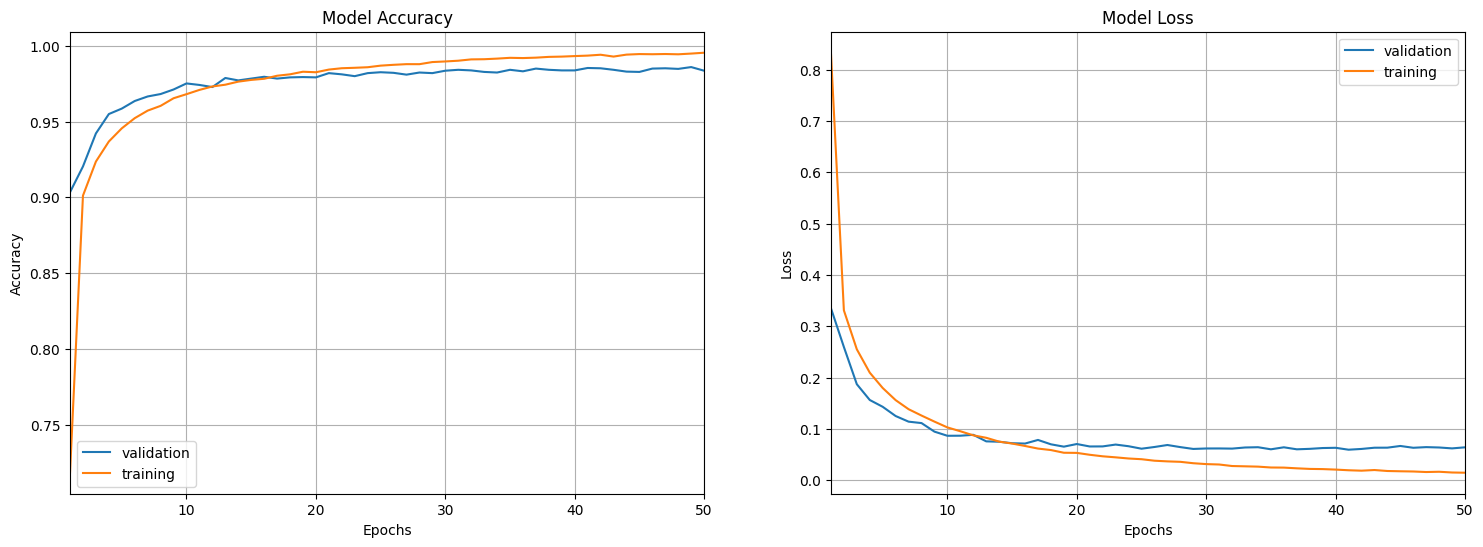

In [7]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show() 